# Corpus creation

First we import a corpus from the library *nltk*, and we transform it to a DataFrame which is the format we would normally get. We pick 4 categories for simplicity.  

In [33]:
import nltk
import pandas as pd
from nltk.corpus import brown
from nltk.tokenize.moses import MosesDetokenizer

# Categorías
categorias = ['adventure','editorial','fiction','news']

y = []
corpus = []
for category in categorias:
    for fileid in brown.fileids(category):
        text = brown.words(fileid)
        text = MosesDetokenizer().detokenize(text,return_str=True)
        corpus.append(text)
        y.append(category)
        
corpus = pd.DataFrame({'class':y, 'text':corpus})
corpus.head()

,class,text
0,adventure,Dan Morgan told himself he would forget Ann Tu...
1,adventure,Gavin paused wearily. ``You can't stay here wi...
2,adventure,"The sentry was not dead. He was, in fact, show..."
3,adventure,``So it wasn't the earthquake that made him re...
4,adventure,"She was carrying a quirt, and she started to r..."


# Corpus processing

In [46]:
from text_processing import text_processor

ATM = text_processor(df = corpus, topic = 'class', text = 'text')
ATM.corpus.head()

C:\Users\jaime.oliver\github\Auto-text-mining\text_processing.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.corpus[text] = self.corpus[text].map(string_pre_processing)


,text
0,None
1,None
2,None
3,None
4,None


In [36]:
ATM.stop_words()
ATM.corpus.head()

C:\Users\jaime.oliver\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,text
0,dan morgan told would forget ann turner well r...
1,gavin paused wearily ca nt stay late said dawn...
2,sentry dead fact showing signs reviving carryi...
3,nt earthquake made return village dammit nt wa...
4,carrying quirt started raise let fall dangle w...


In [37]:
ATM.steemer()
ATM.corpus.head()

C:\Users\jaime.oliver\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,text
0,dan morgan told would forget ann turner well r...
1,gavin paus wearili ca nt stay late said dawn c...
2,sentri dead fact show sign reviv carri enfield...
3,nt earthquak made return villag dammit nt want...
4,carri quirt start rais let fall dangl wrist sa...


In [38]:
ATM.corpus_to_bag_of_words()
ATM.bow_corpus

<129x14227 sparse matrix of type '<class 'numpy.float64'>'
	with 75443 stored elements in Compressed Sparse Row format>

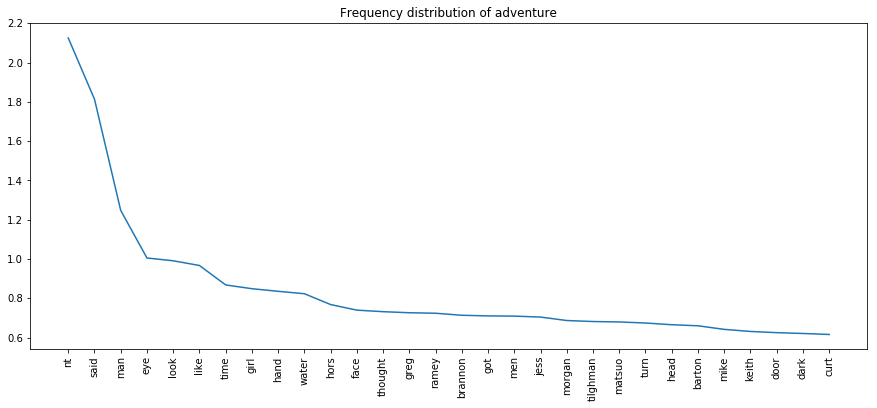

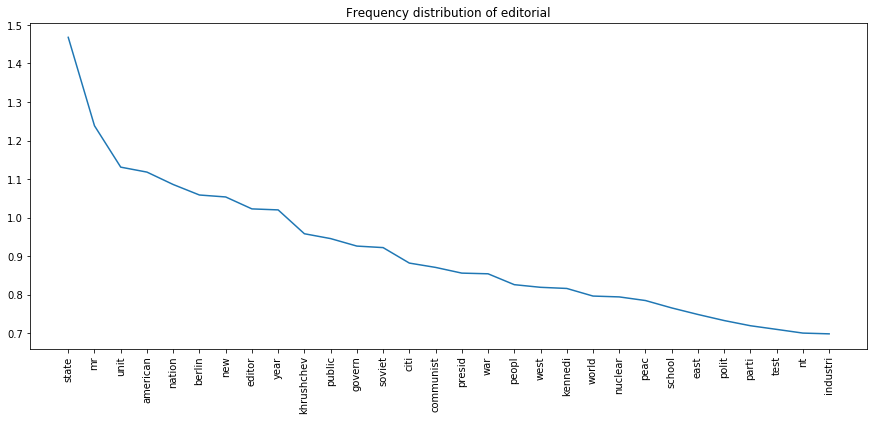

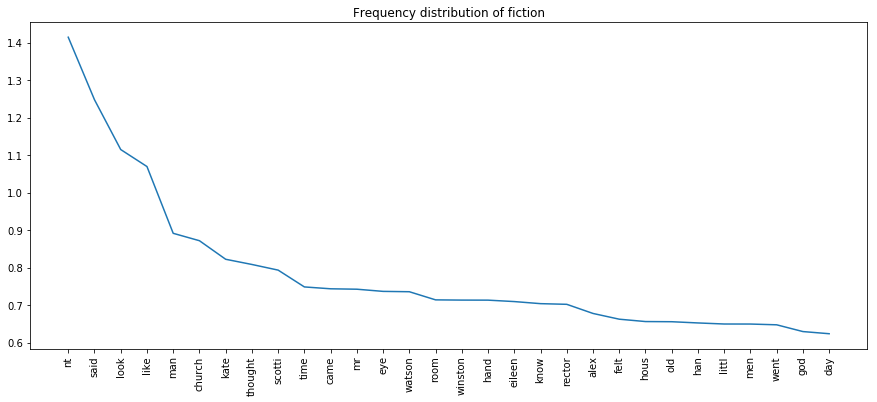

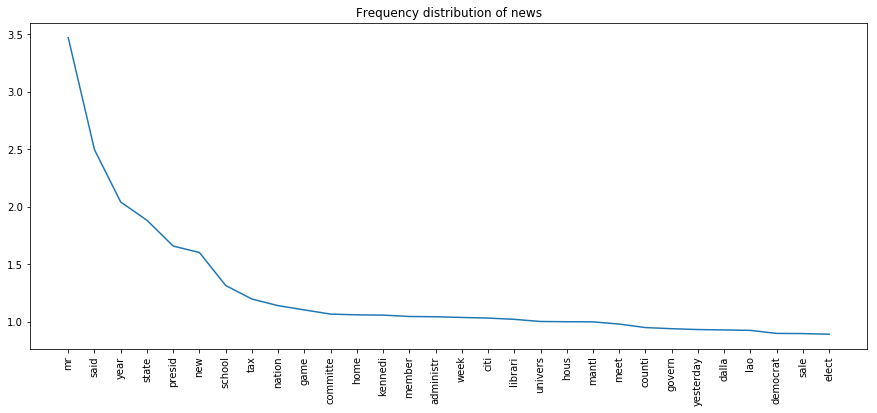

In [39]:
ATM.plot_count_distribution()

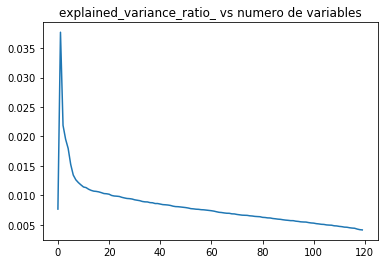

In [40]:
ATM.filter_variance()
ATM.token_cluster(n_clusters = 300)
ATM.token_PCA()

In [41]:
ATM.bow_corpus

array([[ 0.27322338,  0.27453399,  0.02269392, ...,  0.01432648,
         0.01376316, -0.01663805],
       [ 0.21312755,  0.25457254, -0.10414664, ..., -0.00936547,
         0.00238513, -0.00718032],
       [ 0.15519688,  0.1519959 , -0.079707  , ...,  0.00107165,
         0.01243804,  0.00442105],
       ...,
       [ 0.30950403, -0.06029534, -0.05409209, ..., -0.05649224,
        -0.02021379,  0.02219675],
       [ 0.20892799, -0.09269462, -0.03125705, ..., -0.00897335,
         0.00463271,  0.01247202],
       [ 0.20823086, -0.10055526,  0.03921134, ..., -0.02491222,
        -0.1071738 , -0.01901273]])

# Corpus translation

In [47]:
corpus.head()

,class,text
0,adventure,Dan Morgan told himself he would forget Ann Tu...
1,adventure,Gavin paused wearily. ``You can't stay here wi...
2,adventure,"The sentry was not dead. He was, in fact, show..."
3,adventure,``So it wasn't the earthquake that made him re...
4,adventure,"She was carrying a quirt, and she started to r..."


In [ ]:
from textblob import TextBlob
import langid
import nltk

class translator:
    
    ''' Translate texts using TextBlob'''
    
    def __init__(self, df, text, topic, pre_process = True):

        '''
        df: (pd.DataFrame)
        text: name of the column containing the texts (str)
        topic: name of the column containing the label or topic associated
               with each text (str)
        '''

        self.data = df
        self.corpus = df[[text]]
        self.topic = topic
        self.text = text

        def string_pre_processing(x):

            remove_tokens = list(string.punctuation) + \
                ['...', '..', '', '``', '-', '..', '--', '\'\'', '_']

            x = x.lower()

            x = [w for w in nltk.word_tokenize(x) if w not in remove_tokens]

            # Some punctuation signs are not detected, because they stick to tokens
            x = map(lambda y: y.replace('.',''), x)
            x = map(lambda y: y.replace(',',''), x)
            x = map(lambda y: y.replace('\'',''), x)

            x = MosesDetokenizer().detokenize(x,return_str=True)

            return x
        
        if pre_process:
            self.corpus[text] = self.corpus[text].map(string_pre_processing)
            
            
        def language_detect(self, fast = True):
            
            ''' 
            Language identification of the texts: 
            This process is more precise when using TextBlob. If fast=True, the language
            detection will be done using the langid module, which is faster but more imprecise
            '''
            
            if fast:
                

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jan  5 10:46:36 2018

@author: jaime.oliver

Traducción de la tabla de expedientes al catalan
"""
# Tabla inicial con todos los expedientes
tabla_activitat = r'C:\Users\jaime.oliver\Google Drive\Ajuntament Barcelona\Jaume\data\Activitat.csv'
# Tabla con los expedientes traducidos al catalan
tabla_activitat_traducida = r'C:\Users\jaime.oliver\Google Drive\Ajuntament Barcelona\Jaume\data\Activitat_traducida.csv'

import pandas as pd
import numpy as np
from textblob import TextBlob
import langid

df_activitat = pd.read_csv(tabla_activitat)

# Los registros sin ACORDS_EXPEDIENT o ACORDS_ACTIVITAT no se utlizarán
def imputar_acords(x):
    if len(str(x.ACORDS_EXPEDIENT)) > 15:
        return x.ACORDS_EXPEDIENT
    elif len(str(x.ACORDS_ACTIVITAT)) > 15:
        return x.ACORDS_ACTIVITAT
    else:
        return np.nan
    
df_activitat['ACORDS_EXPEDIENT'] = df_activitat.apply(imputar_acords , axis = 1)

df_activitat = df_activitat[df_activitat['ACORDS_EXPEDIENT'].notna()]

#%% DETECCION DE IDIOMA

''' La deteccion con TextBlob es mas precisa, pero es tambien mas lenta 
    lo que resulta en errores de conexion en la API cuando la tabla para traducir es
    demasiado grande. En ese caso, podemos utilizar el modulo langid '''
    
def detect(x):
    proceso = True
    while proceso:
        try:
            lang = TextBlob(x).detect_language()
            proceso = False
            return lang
        except:
            pass
        
idiomas = ['es' , 'ca']

langid.set_languages(idiomas)

df_activitat['idioma_origen'] = df_activitat['ACORDS_EXPEDIENT'].map(lambda x: langid.classify(x)[0])

#%% Traduccion de los textos en castellano al catalan
def translate(x):
    try:
        return TextBlob(x).translate(to = 'ca', from_lang='es')
    except:
        return x
    
# Textos en español
df_activitat_esp = df_activitat[df_activitat.idioma_origen == 'es']
df_activitat_esp['txt_ca'] = df_activitat_esp['ACORDS_EXPEDIENT'].map(lambda x: translate(x))

# Textos en catalan
df_activitat_cat = df_activitat[df_activitat.idioma_origen == 'ca']
df_activitat_cat['txt_ca'] = df_activitat_cat['ACORDS_EXPEDIENT']

df_activitat_final = pd.concat([df_activitat_cat , df_activitat_esp]) 
        
# Escritura de la tabla final traducida
df_activitat_final.to_csv(tabla_activitat_traducida)


In [21]:
class text_processor:

    ''' Pocess a number of texts into the Bag of words representation '''

    def __init__(self, df, text, topic):

        '''
        df: (pd.DataFrame)
        text: name of the column containing the texts (str)
        topic: name of the column containing the label or topic associated
               with each text (str)
        '''
        from nltk.stem.snowball import SnowballStemmer
        from nltk.stem import WordNetLemmatizer

        self.data = df
        self.corpus = df[[text]]
        self.topic = topic
        self.text = text
        self.stopwords = stopwords

    def stop_words(self, lan = 'english' , add_stopwords = [], lower = True):

        '''
        Remove a determined list of stopwords and punctuation from the texts
        lan: language of the text. The stopwords list is taken from the nltk
             package. Default is english. (str)
        add_stopwords: aditional stopwords. (list)
        lower: whether to work with low case or not. The default value is True. (bool)
        '''

        def one_text_filter_stop_words(x, lan = lan , add_stopwords = add_stopwords, lower = lower):

            ''' Function to filter Stop words and punctuation '''
            from nltk.corpus import stopwords
            import string

            stop = stopwords.words('english')+  list(string.punctuation) + \
                ['...', '..', '', '``', '-', '..', '--', '\'\'', '_'] + \
                add_stopwords

            if lower:
                x = x.lower()

            x = [w for w in nltk.word_tokenize(x) if w not in stop]

            # Some punctuation signs are not detected, because they stick to tokens
            x = map(lambda y: y.replace('.',''), x)
            x = map(lambda y: y.replace(',',''), x)
            x = map(lambda y: y.replace('\'',''), x)

            x = MosesDetokenizer().detokenize(x,return_str=True)

            return x

        self.corpus[self.text] = self.corpus[self.text].map(one_text_filter_stop_words)

    def steemer(self, lan = 'english'):
        '''
        Transform tokens to their root.
        lan: language of the text. The process is done calling nltk module.
             Default is english. (str)
        '''

        def one_text_steemer(x, lan = lan):

            ''' Function to steem words fo the text '''

            x =  nltk.word_tokenize(x)

            x = [SnowballStemmer('english').stem(WordNetLemmatizer().lemmatize(w.lower())) for w in x]

            x = MosesDetokenizer().detokenize(x,return_str=True)

            return x

        self.corpus[self.text] = self.corpus[self.text].map(one_text_steemer)

    def corpus_to_bag_of_words(self, method = 'TfidfVectorizer', max_features = None):

        '''
        Convert the text column to a bag of words embedding
        method: whether to use TfidfVectorizer or HashingVectorizer approach,
                both from the sklearn module.  (str)
        max_features: if TfidfVectorizer method is used, the 'max_features' more
                      relevant features are selected. If set to None all the features
                      are used, which is the setting by default. (int)
        '''

        from sklearn.feature_extraction.text import HashingVectorizer
        from sklearn.feature_extraction.text import TfidfVectorizer

        if method == 'TfidfVectorizer':

            max_features = None

            self.vectorizer = TfidfVectorizer(stop_words = 'english',
                                         ngram_range = (1,1),
                                         analyzer='word',
                                         max_features = max_features)

            self.bow_corpus = self.vectorizer.fit_transform(self.corpus[self.text])

        elif method == 'HashingVectorizer':

            self.vectorizer = HashingVectorizer(n_features=100, # n_features (columnas) en la tabla de salida
                      stop_words = 'english',
                      ngram_range = (1,2), # también bigramas y trigramas
                      analyzer='word' # los n-gramas se forman con palabras completas
                      )
            self.bow_corpus = self.vectorizer.transform(corpus)

        else:
            print('No implemented method named ', method)

    def filter_variance(self, threshold = 0.00001):

        '''
        Filter those tokens with a variance in the BOW matrix with less than
        '''

        from sklearn.feature_selection import VarianceThreshold

        selector = VarianceThreshold(threshold=threshold)

        self.bow_corpus = selector.fit_transform(self.bow_corpus.toarray())

    def token_cluster(self, n_clusters = 300):

        from scipy import sparse
        from sklearn.cluster import FeatureAgglomeration

        FA = FeatureAgglomeration(n_clusters = 3000)

        self.bow_corpus = FA.fit_transform(self.bow_corpus)
        self.bow_corpus = sparse.csr_matrix(self.bow_corpus)

    def token_PCA(self, n_components = 120, svd_solver = 'randomized'):

        from sklearn.decomposition import TruncatedSVD
        import matplotlib.pyplot as plt

        pca = TruncatedSVD(n_components =  n_components,
                  algorithm = svd_solver)

        self.bow_corpus = pca.fit_transform(self.bow_corpus)

        # Plot results
        plt.figure()
        plt.title('explained_variance_ratio_ vs numero de variables')
        plt.plot(pca.explained_variance_ratio_)
        plt.show()

    def plot_count_distribution(self, n_items = 30):

        import matplotlib.pyplot as plt
        import numpy as np

        # Diccionario de tokens a tfidf
        bow_v = self.vectorizer.vocabulary_

        # Unique categories
        categories = self.data[self.topic].unique()

        for c in categories:

            # TFIDF acumulado
            sub_tfidf = np.array(np.sum(self.bow_corpus[np.array(y) == c],axis = 0))[0]
            suma = sorted(sub_tfidf , reverse = True)[:n_items]

            # Nombres de los tokens con más tfidf
            indices_importancia = np.argsort(sub_tfidf)[::-1]

            names =np.array(vectorizer.get_feature_names())
            names = names[indices_importancia][:n_items]

            # Figura
            plt.figure(figsize = (15,6))
            plt.plot(list(suma))
            plt.xticks(range(len(names)),names, rotation='vertical')

            titulo = 'Frequency distribution of '+ str(c)
            plt.title(titulo)
            plt.show()

            

In [22]:
ATM = text_processor(df = corpus, topic = 'class', text = 'text')
ATM.stop_words()
ATM.steemer()
ATM.corpus_to_bag_of_words()
# ATM.plot_count_distribution()
ATM.filter_variance()
ATM.token_cluster(n_clusters = 300)
ATM.token_PCA()

C:\Users\jaime.oliver\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


NameError: name 'SnowballStemmer' is not defined